# Sensor data Validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DRDO/1727_99_csv.csv')

In [ ]:
data.shape

(3636, 1025)

# Data Analysis and Preparation

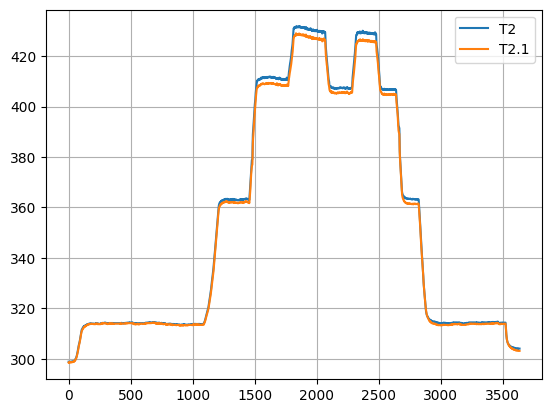

In [ ]:
data[["T2" , "T2.1"]].plot()
plt.grid()

In [ ]:
def clean_dataframe(df):
    # Drop duplicate rows
    df = df.drop_duplicates()

    # Drop missing values
    df = df.dropna()

    # Drop columns with all zeroes
    df = df.loc[:, (df != 0).any(axis=0)]
    
    # Reset the index
    df = df.reset_index(drop=True)


    return df

In [ ]:
df = clean_dataframe(data) 

In [ ]:
df.head()

,Time,T2,T2.1,T2.2,T2.3,T2.4,T2.5,T2.6,T2.7,T2.8,...,T2DBavg,p2DCavg,p2DBavg,P2DBavg,P3Bavg,P2DDDCavg,PJDCavg,PJDBavg,PLINEAR,OTL
0,0,298.8,298.5,298.4,298.4,297.7,298.7,298.4,298.4,298.3,...,298.1,13.3,13.3,13.3,13.3,13.3,13.3,13.3,13.3,77
1,1,298.8,298.6,298.4,298.4,297.7,298.7,298.4,298.4,298.3,...,298.1,13.3,13.3,13.3,13.3,13.3,13.3,13.2,13.3,77
2,2,298.8,298.5,298.4,298.4,297.7,298.7,298.4,298.4,298.3,...,298.1,13.3,13.3,13.3,13.3,13.3,13.3,13.3,13.3,77
3,3,298.8,298.5,298.4,298.4,297.7,298.7,298.4,298.4,298.3,...,298.1,13.3,13.3,13.3,13.3,13.3,13.3,13.3,13.3,77
4,4,298.8,298.5,298.4,298.4,297.7,298.7,298.4,298.4,298.3,...,298.1,13.3,13.3,13.3,13.3,13.3,13.3,13.3,13.3,77


In [ ]:
sensors_using  = df.columns

In [ ]:
num_pipeline = Pipeline([
  ('std_scaler', StandardScaler()),
  ])
df_std = pd.DataFrame(num_pipeline.fit_transform(df.values), columns=df.columns, index=df.index)

In [ ]:
df_std.head()

,Time,T2,T2.1,T2.2,T2.3,T2.4,T2.5,T2.6,T2.7,T2.8,...,T2DBavg,p2DCavg,p2DBavg,P2DBavg,P3Bavg,P2DDDCavg,PJDCavg,PJDBavg,PLINEAR,OTL
0,-1.731575,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-1.183981,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473
1,-1.730622,-1.163903,-1.167292,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-1.183981,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.941086,-1.776357e-15,-2.897473
2,-1.729669,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-1.183981,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473
3,-1.728716,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-1.183981,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473
4,-1.727764,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-1.183981,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473


# Model Testing

## Auto Encoder Neural Network

Autoencoders can learn to reconstruct input data and are effective at detecting 
deviations from the learned patterns. In this case, we can build an autoencoder that takes into account the spatial and correlation aspects of the sensor data.

The autoencoder is defined with an input layer, a hidden layer (encoder), and an output layer (decoder). The model is compiled with the Adam optimizer and the mean squared error loss function. After training the autoencoder, we use it to reconstruct the input data and calculate the mean squared error (MSE) between the original data and the reconstructed data. Anomalies are identified based on the MSE values exceeding a certain percentile threshold.








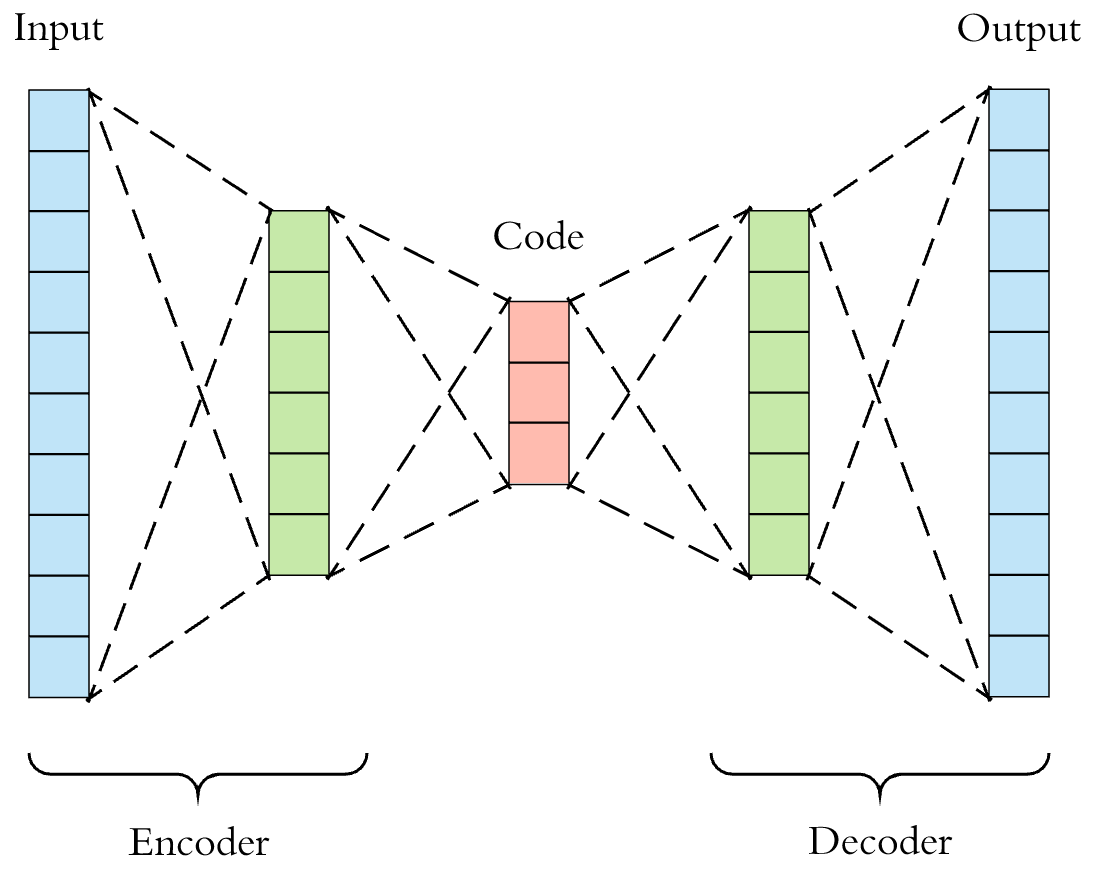

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
sensor_data = df_std
data = sensor_data.values

# Define the autoencoder model
input_dim = data.shape[1]  # Number of features
encoding_dim = 64  # Number of neurons in the hidden layer

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(data, data, epochs=100, batch_size=32, shuffle=True)

# Use the trained autoencoder to detect anomalies
reconstructed_data = autoencoder.predict(data)
mse = np.mean(np.power(data - reconstructed_data, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set a threshold for anomaly detection

# Identify anomalies in the data
anomalies = sensor_data[mse > threshold]

Epoch 1/100
114/114 [==============================] - 5s 3ms/step - loss: 0.6882
Epoch 2/100
114/114 [==============================] - 0s 2ms/step - loss: 0.6011
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 0.5938
Epoch 4/100
114/114 [==============================] - 1s 5ms/step - loss: 0.5895
Epoch 5/100
114/114 [==============================] - 1s 4ms/step - loss: 0.5854
Epoch 6/100
114/114 [==============================] - 0s 3ms/step - loss: 0.5812
Epoch 7/100
114/114 [==============================] - 0s 4ms/step - loss: 0.5775
Epoch 8/100
114/114 [==============================] - 1s 5ms/step - loss: 0.5744
Epoch 9/100
114/114 [==============================] - 0s 3ms/step - loss: 0.5715
Epoch 10/100
114/114 [==============================] - 0s 2ms/step - loss: 0.5689
Epoch 11/100
114/114 [==============================] - 1s 5ms/step - loss: 0.5666
Epoch 12/100
114/114 [==============================] - 1s 7ms/step - loss: 0.5648
Epoch 13/100


In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
2    -1.729669 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
3    -1.728716 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
4    -1.727764 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3631  1.727764 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3633  1.729669 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3635  1.731575 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   T2DBavg   p2DCavg   p

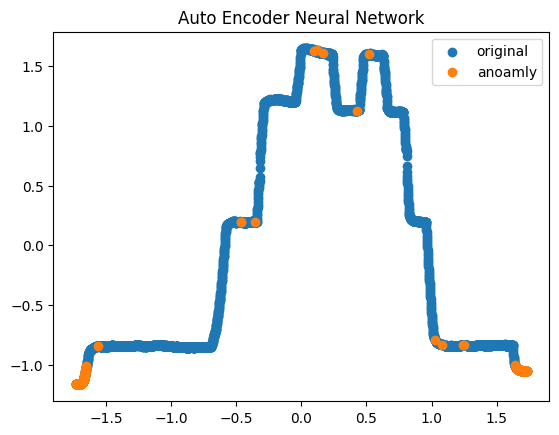

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Auto Encoder Neural Network")
plt.legend()
plt.show()

## Isolation Forest

Isolation Forest is a powerful algorithm for anomaly detection. It works by constructing isolation trees, where anomalies are expected to have shorter path lengths. By randomly partitioning the data and isolating anomalies in separate branches, the algorithm can efficiently identify and isolate anomalous data points. The shorter path lengths required to isolate anomalies make them stand out from normal data points. By setting a threshold, we can classify data points as anomalies if their path lengths fall below the threshold. This approach is effective in detecting anomalies in high-dimensional datasets and does not rely on assumptions about the data distribution, making it versatile for various applications.

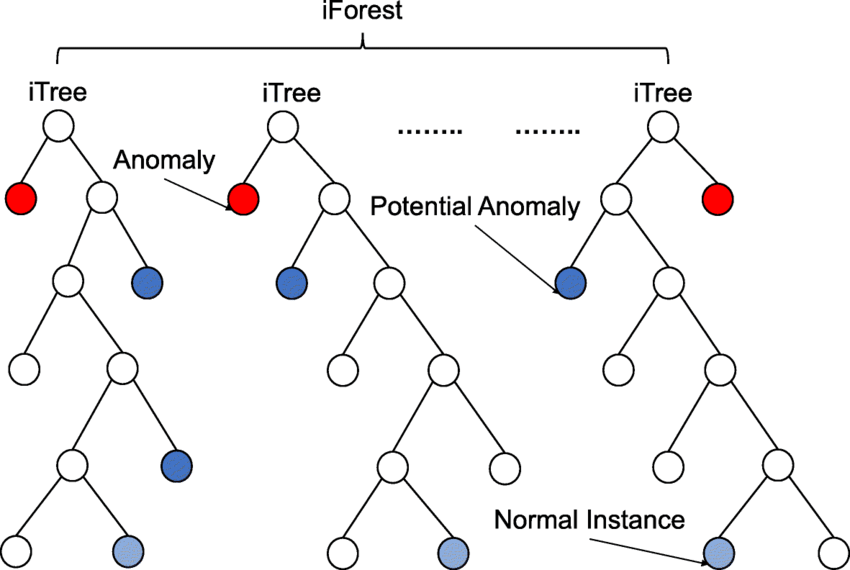

In [ ]:
from sklearn.ensemble import IsolationForest
df_std_IF = df_std
model = IsolationForest(contamination=0.05)
model.fit(df_std)
predictions = model.predict(df_std)
df_std_IF['anomaly'] = predictions
anomalies = df_std_IF[df_std_IF['anomaly'] == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
2    -1.729669 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
3    -1.728716 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
4    -1.727764 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3631  1.727764 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3633  1.729669 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3635  1.731575 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   p2DCavg   p2DBavg    

In [ ]:
anomalies.head()

,Time,T2,T2.1,T2.2,T2.3,T2.4,T2.5,T2.6,T2.7,T2.8,...,p2DCavg,p2DBavg,P2DBavg,P3Bavg,P2DDDCavg,PJDCavg,PJDBavg,PLINEAR,OTL,anomaly
0,-1.731575,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473,-1
1,-1.730622,-1.163903,-1.167292,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.941086,-1.776357e-15,-2.897473,-1
2,-1.729669,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473,-1
3,-1.728716,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473,-1
4,-1.727764,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062,-1.197489,...,-0.947575,-0.931828,-1.776357e-15,-1.776357e-15,-1.776357e-15,-0.838087,-0.929229,-1.776357e-15,-2.897473,-1


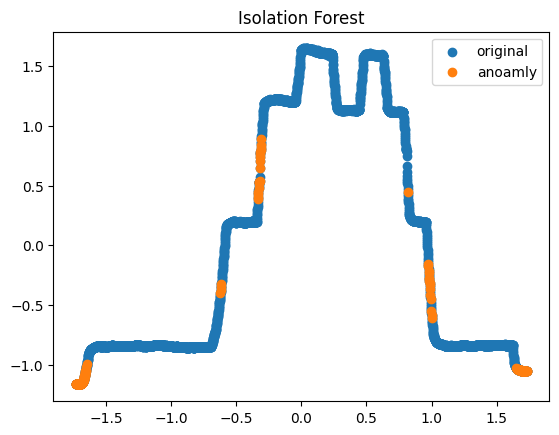

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Isolation Forest")
plt.legend()
plt.show()

In [ ]:
df_std_IF.loc[500]

Time      -1.255213e+00
T2        -8.363782e-01
T2.1      -8.325840e-01
T2.2      -8.330153e-01
T2.3      -8.371236e-01
               ...     
PJDCavg   -7.903144e-01
PJDBavg   -7.988100e-01
PLINEAR   -1.776357e-15
OTL        3.451283e-01
anomaly    1.000000e+00
Name: 500, Length: 769, dtype: float64

testing on the data using a small data set of features

In [ ]:
df_std_temp = df_std.iloc[:, :9]
df_std_temp.head()

,Time,T2,T2.1,T2.2,T2.3,T2.4,T2.5,T2.6,T2.7
0,-1.731575,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062
1,-1.730622,-1.163903,-1.167292,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062
2,-1.729669,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062
3,-1.728716,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062
4,-1.727764,-1.163903,-1.169451,-1.17902,-1.201376,-1.220077,-1.181959,-1.176504,-1.179062


In [ ]:
model = IsolationForest(contamination= 0.0333)
model.fit(df_std_temp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0333)

In [ ]:
df_std_temp.at[500 , "T2"] = -1.2

In [ ]:
df_std_temp.loc[500]

Time   -1.255213
T2     -1.200000
T2.1   -0.832584
T2.2   -0.833015
T2.3   -0.837124
T2.4   -0.843470
T2.5   -0.832438
T2.6   -0.829351
T2.7   -0.829401
Name: 500, dtype: float64

In [ ]:
predictions = model.predict(df_std_temp)
df_std_temp['anomaly'] = predictions
anomalies = df_std_temp[df_std_temp['anomaly'] == -1]
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
40   -1.693466 -1.159677 -1.162973 -1.172572 -1.192954 -1.210114 -1.177590   
41   -1.692513 -1.159677 -1.162973 -1.172572 -1.192954 -1.210114 -1.175405   
42   -1.691560 -1.157564 -1.160814 -1.170423 -1.190849 -1.208122 -1.175405   
43   -1.690607 -1.157564 -1.160814 -1.170423 -1.190849 -1.208122 -1.173221   
...        ...       ...       ...       ...       ...       ...       ...   
2852  0.985592 -0.329243 -0.320805 -0.317233 -0.302325 -0.281548 -0.338740   
2853  0.986545 -0.348261 -0.338080 -0.332276 -0.317063 -0.299481 -0.356216   
2854  0.987498 -0.367278 -0.353196 -0.349469 -0.333908 -0.315422 -0.375877   
2855  0.988450 -0.382070 -0.368312 -0.364513 -0.348646 -0.329371 -0.393353   
2856  0.989403 -0.401087 -0.383428 -0.381705 -0.367596 -0.347304 -0.410829   

          T2.6      T2.7  anomaly  
1    -1.176504 -1.179062   

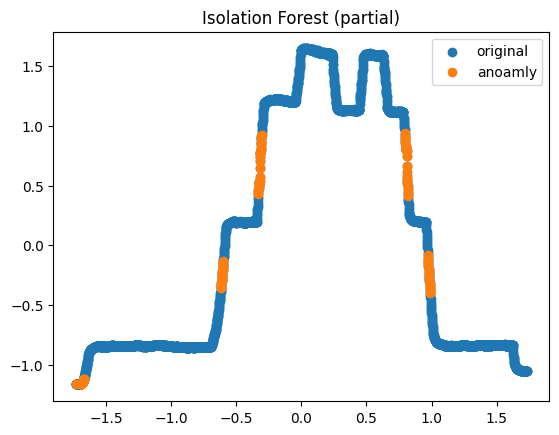

In [ ]:
ttemp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Isolation Forest (partial)")
plt.legend()
plt.show()

In [ ]:
df_std_temp.loc[500]

Time      -1.255213
T2        -1.200000
T2.1      -0.832584
T2.2      -0.833015
T2.3      -0.837124
T2.4      -0.843470
T2.5      -0.832438
T2.6      -0.829351
T2.7      -0.829401
anomaly    1.000000
Name: 500, dtype: float64

## Variational Autoencoder

Variational Autoencoder (VAE) can be employed for anomaly detection by learning a latent representation of the input data and modeling the underlying data distribution. VAEs are generative models that learn to reconstruct input samples accurately while capturing the latent space's distribution. During training, VAEs learn the normal patterns present in the data. During inference, if an input data point deviates significantly from the learned distribution, it suggests the presence of an anomaly. Anomalies can be detected by measuring the reconstruction error, which represents the dissimilarity between the original input and the reconstructed output. A higher reconstruction error indicates a higher likelihood of the data point being an anomaly. VAEs offer a flexible and probabilistic approach to anomaly detection, capable of capturing complex data distributions and handling high-dimensional datasets.

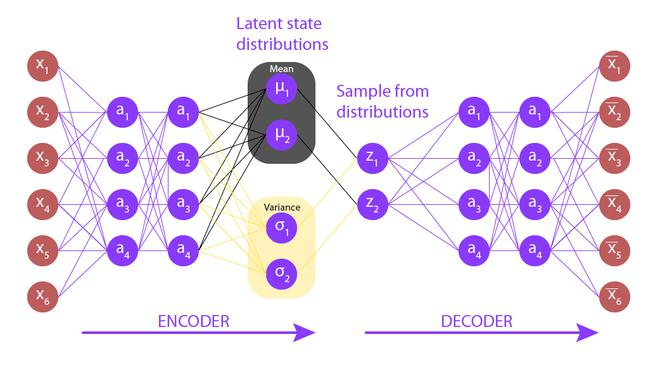

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Load your sensor data into a DataFrame
sensor_data = df_std
sensor_data.head()

# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.
# Convert the DataFrame to a numpy array
data = sensor_data.values

# Define the Variational Autoencoder model
input_dim = data.shape[1]  # Number of features
latent_dim = 2  # Dimensionality of the latent space

# Encoder
encoder_inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(128, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(128, activation='relu')(decoder_inputs)
decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)

# Define the VAE model
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = tf.keras.Model(decoder_inputs, decoder_outputs, name='decoder')

# Connect the encoder and decoder
z_inputs = encoder(encoder_inputs)[2]
reconstructed_outputs = decoder(z_inputs)

# Define the VAE model
vae = tf.keras.Model(encoder_inputs, reconstructed_outputs, name='vae')

# Loss function
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, reconstructed_outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(data, epochs=100, batch_size=32, shuffle=True)

# Use the trained VAE to detect anomalies
reconstructed_data = vae.predict(data)
mse = np.mean(np.power(data - reconstructed_data, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set a threshold for anomaly detection

# Identify anomalies in the data
anomalies = sensor_data[mse > threshold]

Epoch 1/100
114/114 [==============================] - 2s 4ms/step - loss: 598.5497
Epoch 2/100
114/114 [==============================] - 0s 4ms/step - loss: 503.1753
Epoch 3/100
114/114 [==============================] - 0s 4ms/step - loss: 493.5884
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 486.9153
Epoch 5/100
114/114 [==============================] - 0s 4ms/step - loss: 481.9804
Epoch 6/100
114/114 [==============================] - 0s 4ms/step - loss: 480.1113
Epoch 7/100
114/114 [==============================] - 0s 4ms/step - loss: 477.6642
Epoch 8/100
114/114 [==============================] - 0s 4ms/step - loss: 476.3281
Epoch 9/100
114/114 [==============================] - 0s 4ms/step - loss: 475.0485
Epoch 10/100
114/114 [==============================] - 0s 4ms/step - loss: 474.6540
Epoch 11/100
114/114 [==============================] - 0s 4ms/step - loss: 473.4264
Epoch 12/100
114/114 [==============================] - 1s 4ms/step - loss

In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
2    -1.729669 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
3    -1.728716 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
4    -1.727764 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3631  1.727764 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3633  1.729669 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3635  1.731575 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   p2DCavg   p2DBavg    

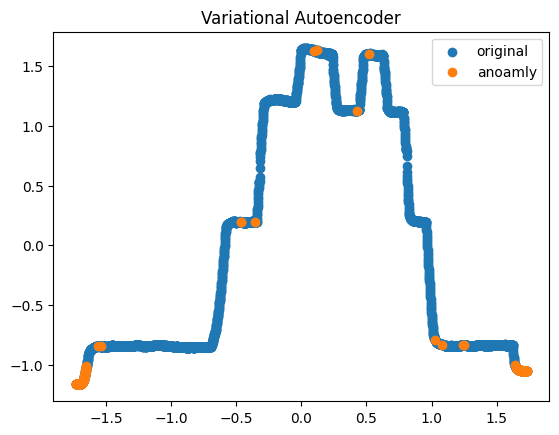

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Variational Autoencoder")
plt.legend()
plt.show()

## One-Class SVM

One-Class SVM is a machine learning algorithm that is particularly useful for anomaly detection when only normal data is available for training. It is effective in capturing complex patterns and can detect outliers and anomalies effectively.

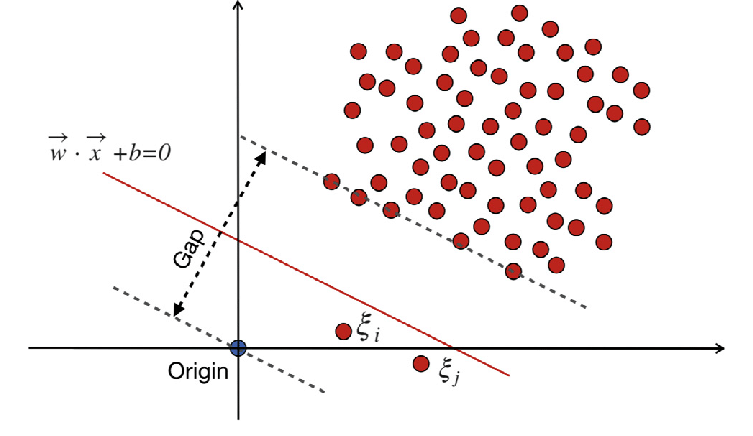

In [ ]:
import pandas as pd
from sklearn.svm import OneClassSVM

sensor_data = df_std
data = sensor_data.values

# Define the One-Class SVM model
nu = 0.05  # Expected fraction of outliers
one_class_svm = OneClassSVM(nu=nu)
one_class_svm.fit(data)

# Predict the anomaly score for each data point
anomaly_scores = one_class_svm.decision_function(data)

# Set a threshold for anomaly detection
threshold = anomaly_scores.mean() - 2 * anomaly_scores.std()

# Identify anomalies in the data
anomalies = sensor_data[anomaly_scores < threshold]

In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
7    -1.724905 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
9    -1.723000 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
14   -1.718236 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
16   -1.716331 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3572  1.671553 -1.041345 -1.048525 -1.056521 -1.068729 -1.060667 -1.079287   
3592  1.690607 -1.047684 -1.059322 -1.067267 -1.079257 -1.070630 -1.088025   
3615  1.712520 -1.054024 -1.067959 -1.073714 -1.085573 -1.074615 -1.094579   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   p2DCavg   p2DBavg    

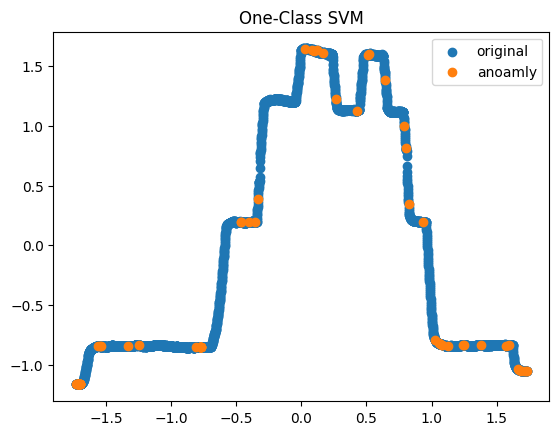

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("One-Class SVM")
plt.legend()
plt.show()

## Gaussian Mixture Model

Gaussian Mixture Model (GMM) is a probabilistic model that represents a dataset as a mixture of Gaussian distributions. GMM can be used for anomaly detection by fitting the model to the data and then evaluating the likelihood of each data point. Anomalies are often characterized by having low likelihoods under the learned GMM. By estimating the parameters of the GMM using an expectation-maximization algorithm, the model can capture the normal patterns in the data. Data points with significantly low likelihoods can be considered anomalies. GMM is particularly effective when the normal data follows a Gaussian distribution and when the anomalies deviate from this distribution. However, it may face challenges in high-dimensional data where the curse of dimensionality can impact its performance. Nonetheless, GMM provides a flexible and probabilistic approach to detect anomalies based on the underlying distribution of the data.

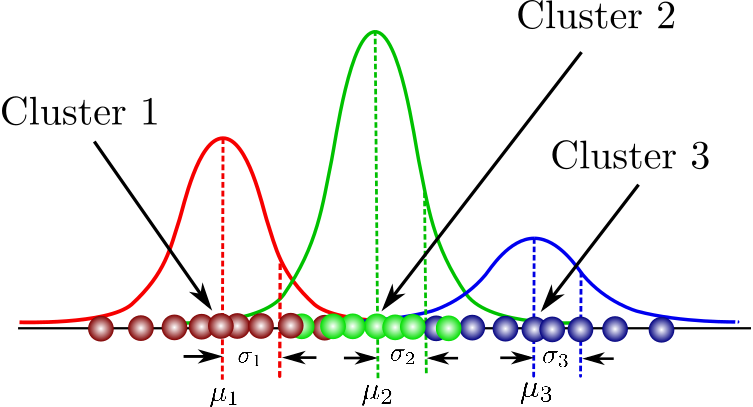

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your sensor data into a DataFrame
sensor_data = df_std

# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.
# Convert the DataFrame to a numpy array
data = sensor_data.values

# Define the Gaussian Mixture Model
n_components = 5  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)

# Calculate the anomaly scores for each data point
anomaly_scores = gmm.score_samples(data)

# Set a threshold for anomaly detection
threshold = anomaly_scores.mean() - 2 * anomaly_scores.std()

# Identify anomalies in the data
anomalies = sensor_data[anomaly_scores < threshold]

In [ ]:
# Print the anomalies
print(anomalies)

Empty DataFrame
Columns: [Time, T2, T2.1, T2.2, T2.3, T2.4, T2.5, T2.6, T2.7, T2.8, T2.9, LUBT.3, T2DB, T2DB.1, T2DC, T2DC.1, T2DC.2, T2DC.3, T2DC.4, LUBT.5, LUBT.6, LUBT.7, LUBT.8, LUBT.9, LUBT.10, LUBT.11, LUBT.12, LUBT.13, LUBT.14, LUBT.15, LUBT.16, LUBT.17, LUBT.18, LUBT.19, LUBT.21, LUBT.22, LUBT.23, LUBT.24, LUBT.25, LUBT.26, LUBT.27, LUBT.28, T.10, T.11, T3.2, T3.3, T3.4, T.17, LUBT.34, LUBT.35, LUBT.36, LUBT.37, LUBT.38, LUBT.39, LUBT.40, LUBT.41, LUBT.42, LUBT.43, LUBT.44, LUBT.45, LUBT.46, LUBT.47, LUBT.48, LUBT.49, TJC, TJC.1, TJC.2, TJC.3, TJC.4, TJB, LUBT.50, LUBT.51, LUBT.52, LUBT.53, LUBT.54, LUBT.55, LUBT.56, LUBT.57, TJB.1, TJC.5, TJC.6, TJC.7, TJC.8, TJC.9, TJC.22, LPTOUT, NHEIT, NHEOT, BPOT, OTT, RPOT, RBST, OCOT, B3ST.1, ICST.1, 1BST, PTOT.1, OCIT, FCFIT, FCFOT, ...]
Index: []

[0 rows x 769 columns]


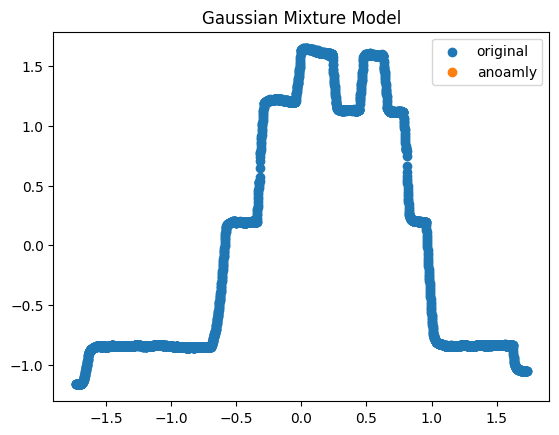

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Gaussian Mixture Model")
plt.legend()
plt.show()

GMM is either faulty or it is soo perfect that it identified all of the values as being correct.

## Long Short-Term Memory (LSTM) Autoencoder

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that can be utilized for anomaly detection. LSTM is well-suited for sequential data analysis, making it effective for detecting anomalies in time series or sequential data. By training an LSTM model on normal patterns, it learns to capture the temporal dependencies and patterns in the data. During inference, the model predicts the next data point based on the historical context. If the actual data significantly deviates from the predicted value, it suggests the presence of an anomaly. Anomalies can be identified by measuring the difference between the predicted and actual values and applying a suitable threshold. LSTM's ability to capture long-term dependencies and handle sequential data makes it a powerful tool for anomaly detection in various domains, such as detecting fraudulent transactions, network intrusions, or equipment failures.

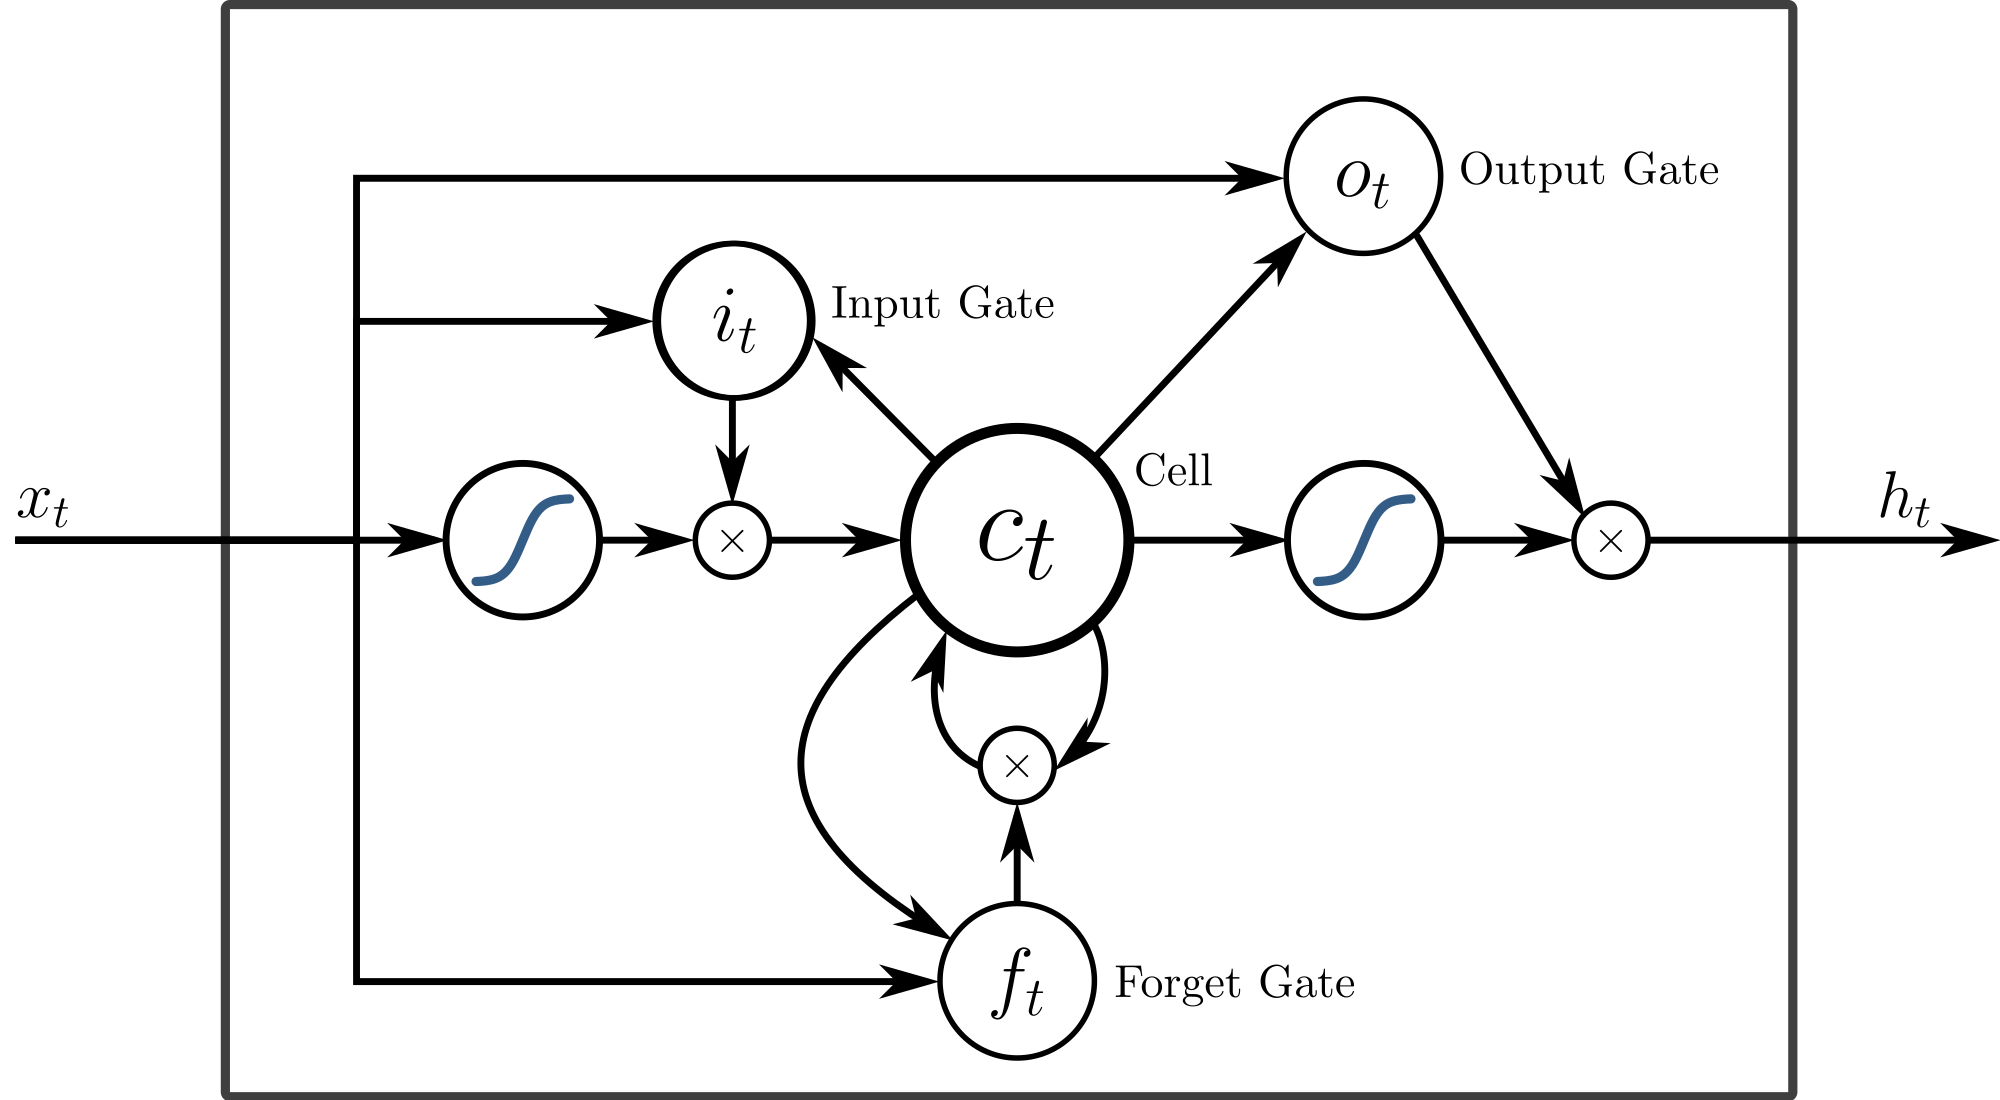

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Load your sensor data into a DataFrame
sensor_data = df_std

# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.
# Convert the DataFrame to a numpy array
data = sensor_data.values

# Normalize the data
data_min = np.min(data)
data_max = np.max(data)
normalized_data = (data - data_min) / (data_max - data_min)

# Reshape the data for LSTM input (assuming it's sequential data)
n_samples, n_features = normalized_data.shape
reshaped_data = normalized_data.reshape((n_samples, n_features, 1))

# Define the LSTM Autoencoder model
input_shape = (n_features, 1)

# Encoder
encoder_inputs = layers.Input(shape=input_shape)
encoder_lstm = layers.LSTM(64, return_sequences=True)(encoder_inputs)
encoder_lstm = layers.LSTM(32, return_sequences=False)(encoder_lstm)
encoded = layers.RepeatVector(n_features)(encoder_lstm)

# Decoder
decoder_lstm = layers.LSTM(32, return_sequences=True)(encoded)
decoder_lstm = layers.LSTM(64, return_sequences=True)(decoder_lstm)
decoder_outputs = layers.TimeDistributed(layers.Dense(1))(decoder_lstm)

# Define the Autoencoder model
autoencoder = tf.keras.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(reshaped_data, reshaped_data, epochs=100, batch_size=32, shuffle=True)

# Use the trained Autoencoder to detect anomalies
reconstructed_data = autoencoder.predict(reshaped_data)
mse = np.mean(np.power(reshaped_data - reconstructed_data, 2), axis=(1, 2))
threshold = np.percentile(mse, 95)  # Set a threshold for anomaly detection

# Identify anomalies in the data
anomalies = sensor_data[mse > threshold]


Epoch 1/100
114/114 [==============================] - 17s 74ms/step - loss: 0.0065
Epoch 2/100
114/114 [==============================] - 9s 78ms/step - loss: 5.8935e-04
Epoch 3/100
114/114 [==============================] - 8s 73ms/step - loss: 4.4453e-04
Epoch 4/100
114/114 [==============================] - 9s 77ms/step - loss: 3.4950e-04
Epoch 5/100
114/114 [==============================] - 9s 78ms/step - loss: 2.4651e-04
Epoch 6/100
114/114 [==============================] - 8s 71ms/step - loss: 1.9112e-04
Epoch 7/100
114/114 [==============================] - 9s 77ms/step - loss: 1.5682e-04
Epoch 8/100
114/114 [==============================] - 9s 79ms/step - loss: 1.3013e-04
Epoch 9/100
114/114 [==============================] - 8s 71ms/step - loss: 1.2268e-04
Epoch 10/100
114/114 [==============================] - 9s 79ms/step - loss: 1.0604e-04
Epoch 11/100
114/114 [==============================] - 9s 78ms/step - loss: 9.5865e-05
Epoch 12/100
114/114 [======================

In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
2    -1.729669 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
3    -1.728716 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
4    -1.727764 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3563  1.662978 -1.037119 -1.042046 -1.050074 -1.062413 -1.054689 -1.072733   
3572  1.671553 -1.041345 -1.048525 -1.056521 -1.068729 -1.060667 -1.079287   
3615  1.712520 -1.054024 -1.067959 -1.073714 -1.085573 -1.074615 -1.094579   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   p2DCavg   p2DBavg    

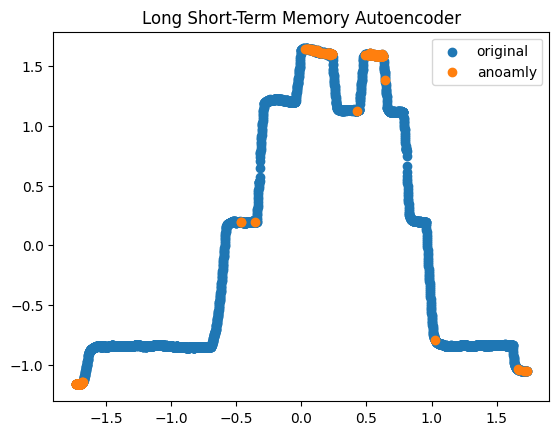

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Long Short-Term Memory Autoencoder")
plt.legend()
plt.show()

## Gaussian Mixture Variational Autoencoder (GMVAE)

Gaussian Mixture Variational Autoencoder (GMVAE) is a probabilistic generative model that combines the power of Gaussian mixture models (GMM) and variational autoencoders (VAE). GMVAE can be used for anomaly detection by learning a latent representation of the input data and modeling the underlying data distribution. During training, the GMVAE learns to reconstruct normal data samples accurately, while anomalies are more challenging to reconstruct. By evaluating the reconstruction error, which measures the dissimilarity between the original input and the reconstructed output, anomalies can be detected. A higher reconstruction error indicates a higher likelihood of the data point being an anomaly. GMVAE's ability to capture complex data distributions using Gaussian mixtures and the flexibility of VAEs in learning latent representations make it an effective approach for detecting anomalies in diverse datasets.

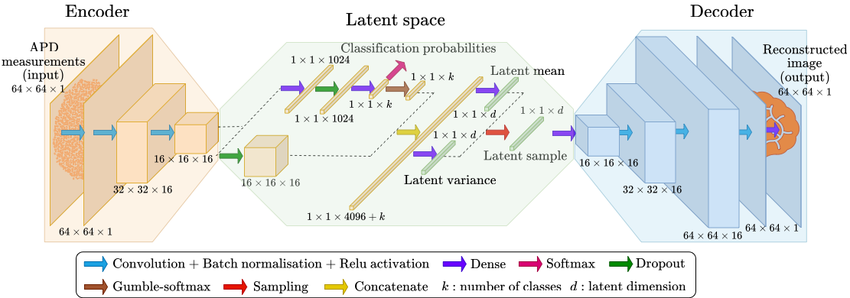

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers

# Load your sensor data into a DataFrame
sensor_data = df_std

# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.
# Convert the DataFrame to a numpy array
data = sensor_data.values

# Normalize the data
data_min = np.min(data)
data_max = np.max(data)
normalized_data = (data - data_min) / (data_max - data_min)

# Define the Gaussian Mixture Variational Autoencoder model
input_dim = normalized_data.shape[1]  # Number of features
latent_dim = 2  # Latent space dimension
n_components = 5  # Number of Gaussian components

# Custom layer for KL Divergence calculation
class KLDivergenceLayer(layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        prior_distribution = tfp.distributions.MultivariateNormalDiag(
            loc=tf.zeros_like(mean),
            scale_diag=tf.ones_like(log_var)
        )
        posterior_distribution = tfp.distributions.MultivariateNormalDiag(
            loc=mean,
            scale_diag=tf.exp(0.5 * log_var)
        )
        kl_loss = tf.reduce_mean(tfp.distributions.kl_divergence(posterior_distribution, prior_distribution))
        self.add_loss(kl_loss)
        return inputs

# Encoder
encoder_inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
mean = layers.Dense(latent_dim)(x)
log_var = layers.Dense(latent_dim)(x)
kl_divergence = KLDivergenceLayer()([mean, log_var])

# Latent space sampling
epsilon = tf.keras.backend.random_normal(shape=tf.shape(mean))
z = mean + tf.exp(0.5 * log_var) * epsilon

# Decoder
x = layers.Dense(32, activation='relu')(z)
x = layers.Dense(64, activation='relu')(x)
decoder_outputs = layers.Dense(input_dim)(x)

# Define the Autoencoder model
autoencoder = tf.keras.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder.compile(optimizer='adam' , loss = 'mse')

# Train the Autoencoder
autoencoder.fit(normalized_data, normalized_data, epochs=100, batch_size=32, shuffle=True)

# Use the trained Autoencoder to detect anomalies
reconstructed_data = autoencoder.predict(normalized_data)
mse = np.mean(np.power(normalized_data - reconstructed_data, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set a threshold for anomaly detection

# Identify anomalies in the data
anomalies = sensor_data[mse > threshold]

Epoch 1/100
114/114 [==============================] - 3s 4ms/step - loss: 0.0188
Epoch 2/100
114/114 [==============================] - 0s 4ms/step - loss: 9.4668e-05
Epoch 3/100
114/114 [==============================] - 0s 4ms/step - loss: 8.8853e-05
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 8.7444e-05
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 8.6485e-05
Epoch 6/100
114/114 [==============================] - 0s 4ms/step - loss: 8.6405e-05
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - loss: 8.5655e-05
Epoch 8/100
114/114 [==============================] - 1s 5ms/step - loss: 8.6560e-05
Epoch 9/100
114/114 [==============================] - 1s 5ms/step - loss: 8.6134e-05
Epoch 10/100
114/114 [==============================] - 1s 5ms/step - loss: 8.6404e-05
Epoch 11/100
114/114 [==============================] - 1s 5ms/step - loss: 8.6193e-05
Epoch 12/100
114/114 [==============================] - 

In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
0    -1.731575 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
1    -1.730622 -1.163903 -1.167292 -1.179020 -1.201376 -1.220077 -1.181959   
2    -1.729669 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
3    -1.728716 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
4    -1.727764 -1.163903 -1.169451 -1.179020 -1.201376 -1.220077 -1.181959   
...        ...       ...       ...       ...       ...       ...       ...   
3631  1.727764 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3632  1.728716 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3633  1.729669 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3634  1.730622 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   
3635  1.731575 -1.054024 -1.070119 -1.078012 -1.089784 -1.078601 -1.096763   

          T2.6      T2.7      T2.8  ...   p2DCavg   p2DBavg    

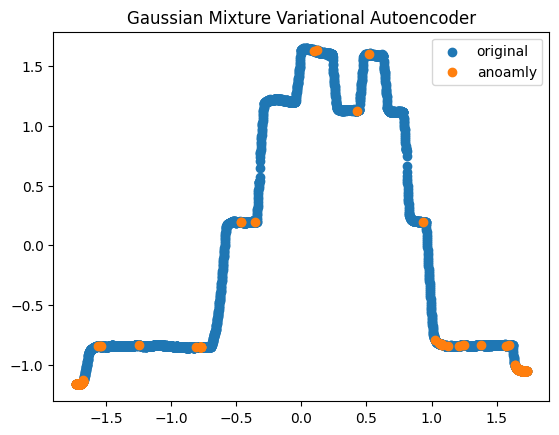

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Gaussian Mixture Variational Autoencoder")
plt.legend()
plt.show()

## SHapely Additive exPlantations

Shapely Additive Explanations (SHAP) is a framework for interpreting the predictions of machine learning models. In anomaly detection, SHAP can be used to identify the features or variables that contribute the most to the abnormality of a data point. By applying SHAP to an anomaly detection model, we can understand which features have the strongest influence on the anomaly score or classification. This allows us to gain insights into the specific factors driving the anomalous behavior. By analyzing the SHAP values, which represent the contribution of each feature to the anomaly score, we can identify the key features responsible for the detected anomalies. SHAP-based anomaly detection can provide valuable explanations and insights into the factors contributing to abnormal instances, aiding in understanding the underlying causes and making informed decisions for anomaly mitigation or further investigation.

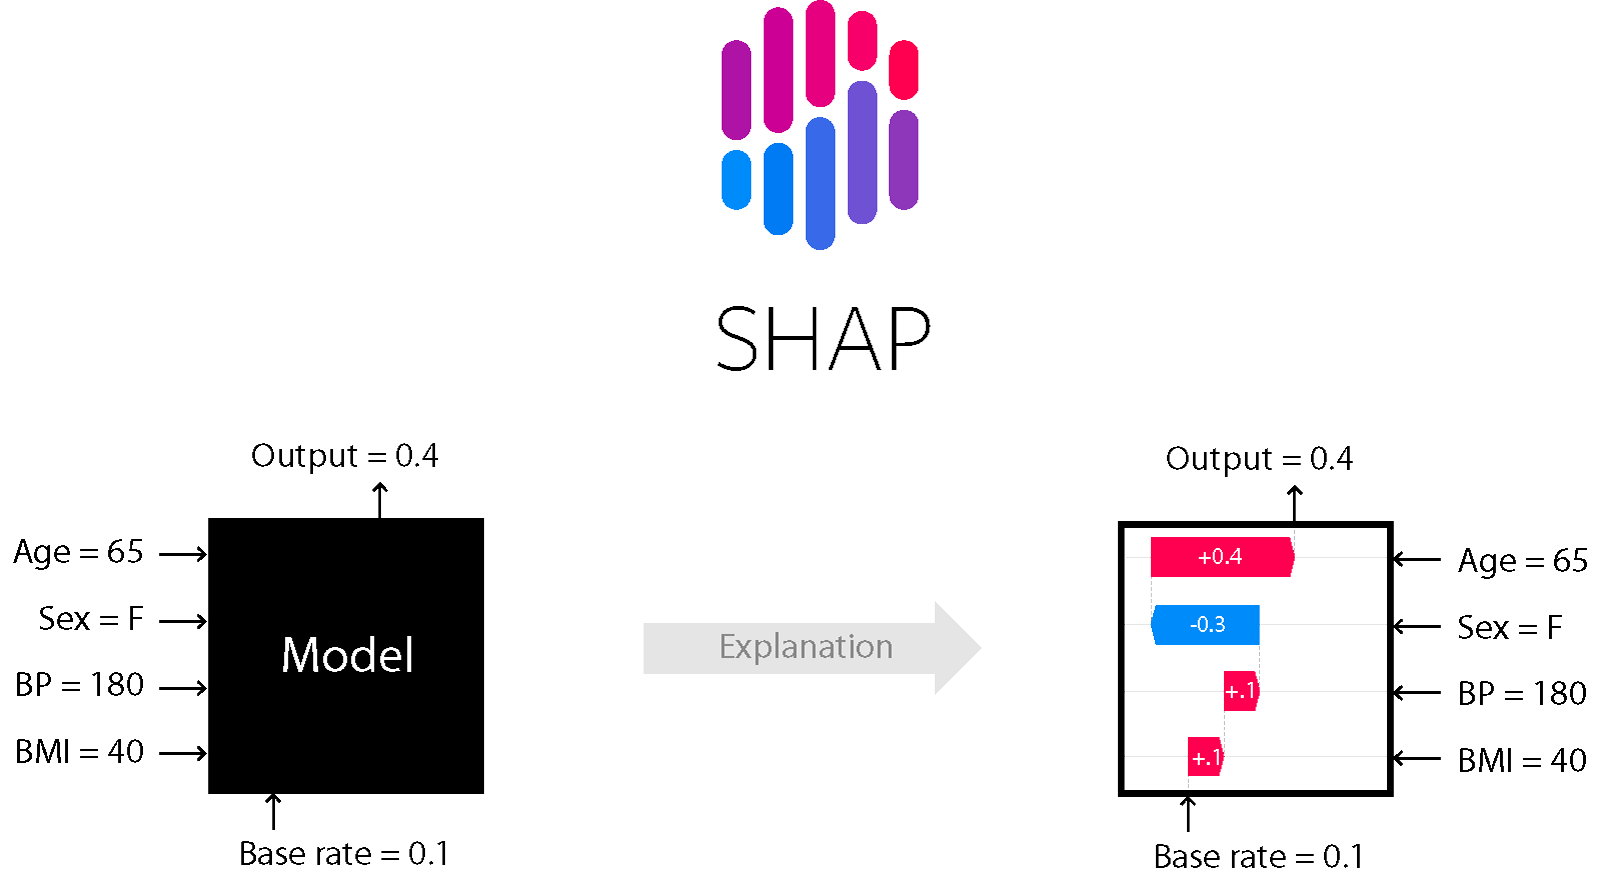

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 25.8 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


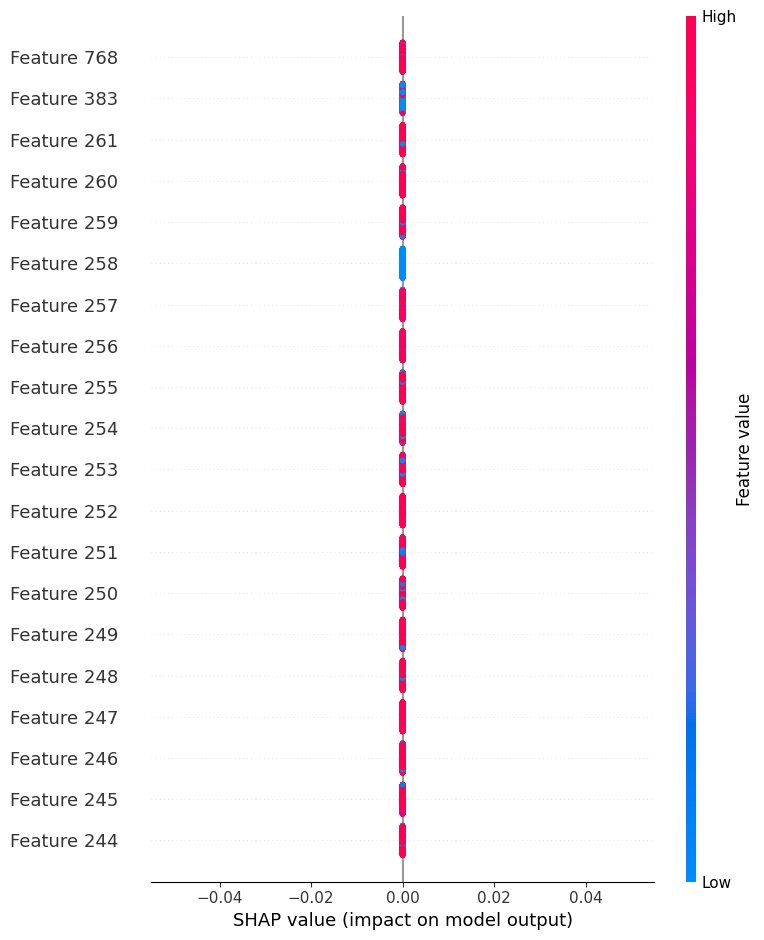

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap

# Load your sensor data into a DataFrame
sensor_data = df_std

sensor_data[['anomalies']] = 0
# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.

# Split the data into training and testing sets
train_size = int(0.8 * len(sensor_data))
train_data = sensor_data[:train_size]
test_data = sensor_data[train_size:]

# Separate the features and target variable
X_train = train_data.drop(columns=['anomalies']).values
y_train = train_data['anomalies'].values
X_test = test_data.drop(columns=['anomalies']).values
y_test = test_data['anomalies'].values

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values, X_test)

# Set a threshold for anomaly detection based on SHAP values
threshold = np.percentile(np.abs(shap_values.values), 95)

# Identify anomalies in the data
anomalies = test_data[np.abs(shap_values.values) > threshold]

In [ ]:
# Print the anomalies
print(anomalies)

Empty DataFrame
Columns: [Time, T2, T2.1, T2.2, T2.3, T2.4, T2.5, T2.6, T2.7, T2.8, T2.9, LUBT.3, T2DB, T2DB.1, T2DC, T2DC.1, T2DC.2, T2DC.3, T2DC.4, LUBT.5, LUBT.6, LUBT.7, LUBT.8, LUBT.9, LUBT.10, LUBT.11, LUBT.12, LUBT.13, LUBT.14, LUBT.15, LUBT.16, LUBT.17, LUBT.18, LUBT.19, LUBT.21, LUBT.22, LUBT.23, LUBT.24, LUBT.25, LUBT.26, LUBT.27, LUBT.28, T.10, T.11, T3.2, T3.3, T3.4, T.17, LUBT.34, LUBT.35, LUBT.36, LUBT.37, LUBT.38, LUBT.39, LUBT.40, LUBT.41, LUBT.42, LUBT.43, LUBT.44, LUBT.45, LUBT.46, LUBT.47, LUBT.48, LUBT.49, TJC, TJC.1, TJC.2, TJC.3, TJC.4, TJB, LUBT.50, LUBT.51, LUBT.52, LUBT.53, LUBT.54, LUBT.55, LUBT.56, LUBT.57, TJB.1, TJC.5, TJC.6, TJC.7, TJC.8, TJC.9, TJC.22, LPTOUT, NHEIT, NHEOT, BPOT, OTT, RPOT, RBST, OCOT, B3ST.1, ICST.1, 1BST, PTOT.1, OCIT, FCFIT, FCFOT, ...]
Index: []

[0 rows x 770 columns]


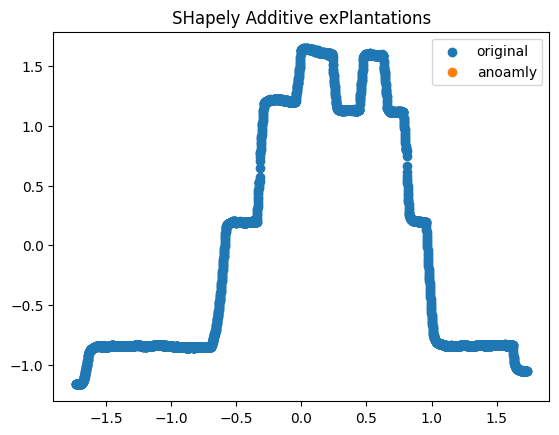

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("SHapely Additive exPlantations")
plt.legend()
plt.show()

## Depth Based Isolation Forest Feature Importance

Depth-based Isolation Forest Feature Importance is a technique used in anomaly detection to determine the importance of features in isolating anomalies using the Isolation Forest algorithm. By examining the depths at which anomalies are isolated within the forest, we can infer the significance of each feature in distinguishing normal and abnormal instances. Features that consistently appear higher in the isolation tree depths indicate their importance in identifying anomalies. By ranking the features based on their average depth in the trees, we can assess their relative importance in anomaly detection. This information helps in understanding which features contribute the most to the detection of anomalies and can guide feature selection or engineering efforts. Depth-based Isolation Forest Feature Importance provides a valuable tool for feature analysis and selection, enhancing the effectiveness of anomaly detection models.

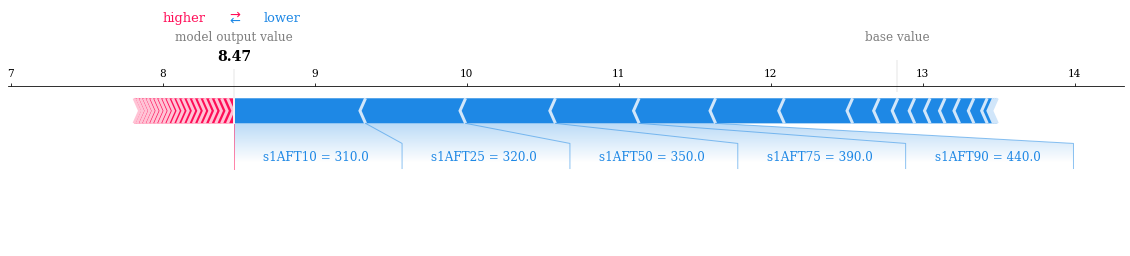

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load your sensor data into a DataFrame
sensor_data = df_std

# Preprocess the data
# Assuming you have already handled missing values, scaling, etc.

# Separate the features and target variable
X = sensor_data.drop(columns=['T2']).values
y = sensor_data['T2'].values

# Train the Isolation Forest model
model = IsolationForest(contamination='auto')
model.fit(X)

# Calculate anomaly scores
anomaly_scores = model.decision_function(X)

# Calculate feature importance
feature_importance = np.sum(model.score_samples(X)[:, None] * (X - np.mean(X, axis=0))**2, axis=0)

# Sort and print feature importance
sorted_features = sorted(zip(sensor_data.columns[:-1], feature_importance), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

# Set a threshold for anomaly detection based on anomaly scores
threshold = pd.Series(anomaly_scores).quantile(0.95)

# Identify anomalies in the data
anomalies = sensor_data[anomaly_scores > threshold]

Feature: XYZ, Importance: 0.0
Feature: ATSST, Importance: 0.0
Feature: T1, Importance: 0.0
Feature: T1.1, Importance: 0.0
Feature: rtd1, Importance: 0.0
Feature: rtd1.1, Importance: 0.0
Feature: rtd1.2, Importance: 0.0
Feature: rtd1.3, Importance: 0.0
Feature: rtd1.4, Importance: 0.0
Feature: rtd1.5, Importance: 0.0
Feature: rtd1.6, Importance: 0.0
Feature: rtd1.7, Importance: 0.0
Feature: rtd1.8, Importance: 0.0
Feature: IDBP, Importance: 0.0
Feature: 1BSP.2, Importance: 0.0
Feature: RPOP.1, Importance: 0.0
Feature: MuxCH.2, Importance: 0.0
Feature: V.19, Importance: 0.0
Feature: NHEOP.1, Importance: 0.0
Feature: NHEOP.2, Importance: 0.0
Feature: OilFull, Importance: 0.0
Feature: XG, Importance: 0.0
Feature: CTJDC, Importance: 0.0
Feature: CTET, Importance: 0.0
Feature: T4, Importance: 0.0
Feature: COUNTERL2, Importance: 0.0
Feature: COUNTER, Importance: 0.0
Feature: LANE, Importance: 0.0
Feature: P2P1, Importance: 0.0
Feature: DAY, Importance: 0.0
Feature: MONTH, Importance: 0.0
Feat

In [ ]:
# Print the anomalies
print(anomalies)

          Time        T2      T2.1      T2.2      T2.3      T2.4      T2.5  \
347  -1.400980 -0.842717 -0.836903 -0.837313 -0.839229 -0.845463 -0.836807   
350  -1.398121 -0.838491 -0.834743 -0.837313 -0.839229 -0.845463 -0.834623   
385  -1.364776 -0.840604 -0.836903 -0.837313 -0.841335 -0.845463 -0.834623   
396  -1.354296 -0.840604 -0.836903 -0.839463 -0.841335 -0.847455 -0.834623   
406  -1.344769 -0.840604 -0.836903 -0.839463 -0.841335 -0.847455 -0.834623   
...        ...       ...       ...       ...       ...       ...       ...   
1072 -0.710255 -0.849057 -0.847700 -0.848059 -0.851862 -0.855426 -0.847730   
1076 -0.706444 -0.849057 -0.847700 -0.848059 -0.851862 -0.857418 -0.847730   
1078 -0.704539 -0.849057 -0.847700 -0.848059 -0.851862 -0.857418 -0.847730   
1079 -0.703586 -0.849057 -0.847700 -0.848059 -0.851862 -0.855426 -0.847730   
3196  1.313329 -0.842717 -0.845540 -0.850208 -0.853968 -0.851440 -0.841176   

          T2.6      T2.7      T2.8  ...   p2DBavg       P2DBavg

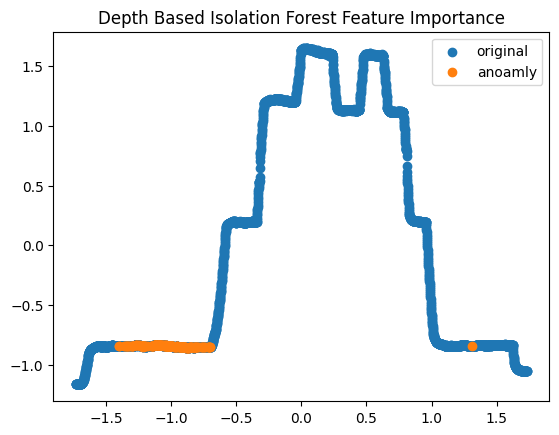

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Depth Based Isolation Forest Feature Importance")
plt.legend()
plt.show()

## Recurrent Auto Encoder

Recurrent Autoencoder (RAE) is a type of autoencoder architecture that is designed to capture sequential patterns in data. RAE can be used for anomaly detection by training the model on normal sequential data and then reconstructing it accurately. During the training phase, the RAE learns to encode the temporal dependencies in the data into a latent representation. When presented with anomalous sequences during testing, the model struggles to reconstruct them accurately, leading to higher reconstruction errors. By setting a threshold on the reconstruction error, we can identify and flag sequences with significantly higher errors as anomalies. RAEs are particularly effective in detecting anomalies in sequential data, such as time series or natural language processing tasks, where deviations from the learned patterns are indicative of anomalies. The ability of RAEs to capture temporal dependencies and reconstruct sequential data makes them a powerful tool for anomaly detection in dynamic and time-dependent datasets.

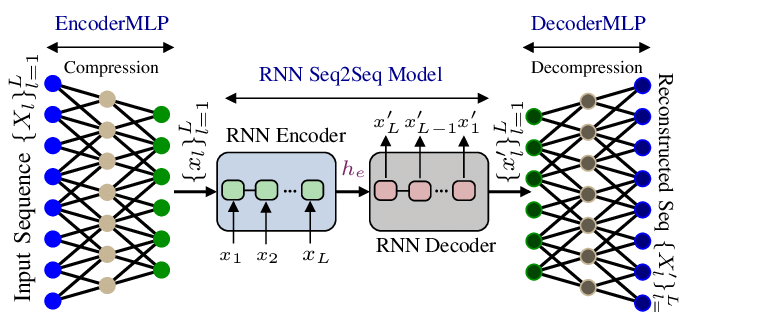

In [ ]:
sensor_data = df_std
sensor_data.shape

(3636, 770)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

# Define the architecture of the autoencoder model
input_dim = 770  # Dimensionality of input data
hidden_dim = 64  # Dimensionality of the hidden layer
sequence_length = 3636  # Length of input sequence

# Encoder
encoder_inputs = tf.keras.Input(shape=(sequence_length, input_dim))
encoder = layers.LSTM(hidden_dim, return_sequences=True)(encoder_inputs)
encoder = layers.LSTM(hidden_dim, return_sequences=False)(encoder)

# Decoder
decoder = layers.RepeatVector(sequence_length)(encoder)
decoder = layers.LSTM(hidden_dim, return_sequences=True)(decoder)
decoder_outputs = layers.TimeDistributed(layers.Dense(input_dim))(decoder)

# Autoencoder model
autoencoder = tf.keras.Model(encoder_inputs, decoder_outputs)

# Compile the model
autoencoder.compile(optimizer="adam", loss="mse")

# Assuming you have your own sensor data in the variable 'sensor_data'

# Extract the values from the DataFrame and reshape them
sensor_data_values = sensor_data.values
sensor_data_reshaped = sensor_data_values.reshape(-1, sequence_length, input_dim)

# Train the autoencoder
autoencoder.fit(sensor_data_reshaped, sensor_data_reshaped, epochs=10, batch_size=32)

# Detect anomalies
reconstructions = autoencoder.predict(sensor_data_reshaped)
mse = np.mean(np.square(sensor_data_reshaped - reconstructions), axis=(1, 2))
threshold = np.mean(mse) + 2 * np.std(mse)  # Define a threshold for anomaly detection

anomalies = sensor_data_reshaped[mse > threshold]

# Reshape the anomalies to match the expected shape
num_anomalies = anomalies.shape[0]
anomalies_reshaped = anomalies.reshape(num_anomalies * sequence_length, input_dim)

# Create a DataFrame with the original column names
anomalies_df = pd.DataFrame(anomalies_reshaped, columns=sensor_data.columns)

# Print the DataFrame containing the anomalies

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.9239
Epoch 2/10
1/1 [==============================] - 0s 290ms/step - loss: 0.9234
Epoch 3/10
1/1 [==============================] - 0s 291ms/step - loss: 0.9231
Epoch 4/10
1/1 [==============================] - 0s 302ms/step - loss: 0.9225
Epoch 5/10
1/1 [==============================] - 0s 322ms/step - loss: 0.9223
Epoch 6/10
1/1 [==============================] - 0s 300ms/step - loss: 0.9221
Epoch 7/10
1/1 [==============================] - 0s 301ms/step - loss: 0.9221
Epoch 8/10
1/1 [==============================] - 0s 288ms/step - loss: 0.9221
Epoch 9/10
1/1 [==============================] - 0s 283ms/step - loss: 0.9220
Epoch 10/10
1/1 [==============================] - 1s 1s/step


In [ ]:
print(anomalies_df)

Empty DataFrame
Columns: [Time, T2, T2.1, T2.2, T2.3, T2.4, T2.5, T2.6, T2.7, T2.8, T2.9, LUBT.3, T2DB, T2DB.1, T2DC, T2DC.1, T2DC.2, T2DC.3, T2DC.4, LUBT.5, LUBT.6, LUBT.7, LUBT.8, LUBT.9, LUBT.10, LUBT.11, LUBT.12, LUBT.13, LUBT.14, LUBT.15, LUBT.16, LUBT.17, LUBT.18, LUBT.19, LUBT.21, LUBT.22, LUBT.23, LUBT.24, LUBT.25, LUBT.26, LUBT.27, LUBT.28, T.10, T.11, T3.2, T3.3, T3.4, T.17, LUBT.34, LUBT.35, LUBT.36, LUBT.37, LUBT.38, LUBT.39, LUBT.40, LUBT.41, LUBT.42, LUBT.43, LUBT.44, LUBT.45, LUBT.46, LUBT.47, LUBT.48, LUBT.49, TJC, TJC.1, TJC.2, TJC.3, TJC.4, TJB, LUBT.50, LUBT.51, LUBT.52, LUBT.53, LUBT.54, LUBT.55, LUBT.56, LUBT.57, TJB.1, TJC.5, TJC.6, TJC.7, TJC.8, TJC.9, TJC.22, LPTOUT, NHEIT, NHEOT, BPOT, OTT, RPOT, RBST, OCOT, B3ST.1, ICST.1, 1BST, PTOT.1, OCIT, FCFIT, FCFOT, ...]
Index: []

[0 rows x 770 columns]


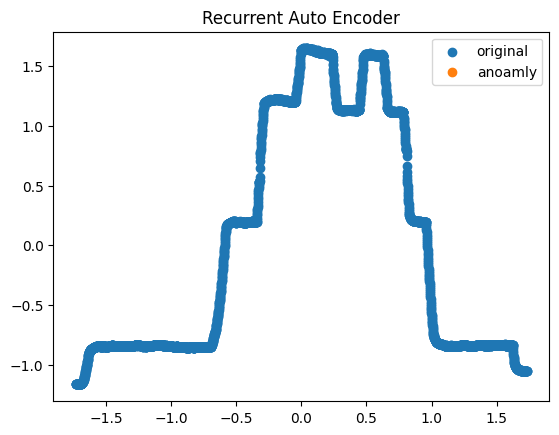

In [ ]:
temp_org = df_std['T2'].to_numpy()
temp_ano = anomalies_df['T2'].to_numpy()
time_org = df_std['Time'].to_numpy()
time_ano = anomalies_df['Time'].to_numpy()
plt.scatter(time_org, temp_org , label = 'original')
plt.scatter(time_ano, temp_ano , label = 'anoamly')
plt.title("Recurrent Auto Encoder")
plt.legend()
plt.show()